# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [28]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sb
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# Create two new dataframes

beer_df = pd.read_csv("beer_reviews.csv", index_col=[0])

C:\Users\Madeline\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [23]:
beer_df.head() #See first few columns and row information. review_time seems to be in a weird format - 
# I will have to fix that. Otherwise all looks okay!

# Some questions I have about this data:
# What styles of beer get the highest ratings - and ratings per subcategory? (eg, lumping all ales together)
# What are the most popular and most highly rated beers and breweries?
# What are the most popular and most highly rated styles?
# Are there "power users" who check in many beers and how do their tasts differ from the average user?
# How to convert time to datetime, and how has the popularity of different styles changed over time?
# (in number of reviews as well as average rating?)
# How do ABV and popularity compare?

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
brewery_id,,,,,,,,,,,,
10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [18]:
beer_df.describe() #Get a sense of distributions, minimum, max, average, etc. for quantiative fields
# Why are the values for description in exponent format? Is this because there are some large values
# in this table so they have to represent even small values in exponent format?
# Also interesting that the minimum values for aroma, palate, and taste are 1 but for appearance and overall
# seem to be zero - that will skew things downward, I would think?

,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [19]:
beer_df.info() # Get a sense of non-null value distribution. We have some null values in brewery name,
# profile name, and ABV columns. There are only about 15 missing brewery name columns - this should be an
# easy fix - maybe now-defunct breweries? Can search by name and style of beer. 
# I would also think missing user ID is a case of a deleted account, but user ID isn't an especially important
# field for analysis and there are only 400 missing values out of 1.5 million rows.
# There is more significant loss in the ABV column - we are missing ABV information for about 70,000 
# beers. I'll have to consider the best way to handle this. I think that filling in the average for the beer
# style could be a good way of doing it.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586614 entries, 10325 to 14359
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_name        1586599 non-null  object 
 1   review_time         1586614 non-null  int64  
 2   review_overall      1586614 non-null  float64
 3   review_aroma        1586614 non-null  float64
 4   review_appearance   1586614 non-null  float64
 5   review_profilename  1586266 non-null  object 
 6   beer_style          1586614 non-null  object 
 7   review_palate       1586614 non-null  float64
 8   review_taste        1586614 non-null  float64
 9   beer_name           1586614 non-null  object 
 10  beer_abv            1518829 non-null  float64
 11  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 157.4+ MB


In [17]:
style_counts = beer_df.value_counts(["beer_style"])

style_counts # How many styles of beer are considered? Will there be too many to meaningfully analyze?
# Seems okay - only 104 types! Wow, American IPA is by far the most popular. It would be interesting to
# aggregate the pale ales to see their % of total. 

beer_style                      
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Length: 104, dtype: int64

In [62]:
beer_df.groupby(["beer_style"])["review_overall"].mean().nsmallest(5) #Lowest rated (need to cross ref num)

beer_style
Low Alcohol Beer        2.578268
American Malt Liquor    2.678854
Light Lager             2.698833
Euro Strong Lager       2.862518
Happoshu                2.914938
Name: review_overall, dtype: float64

In [64]:
beer_df.groupby(["beer_style"])["review_overall"].mean().nlargest(5) #Highest rated (need to cross ref num)

beer_style
American Wild Ale                   4.093262
Gueuze                              4.086287
Quadrupel (Quad)                    4.071630
Lambic - Unblended                  4.048923
American Double / Imperial Stout    4.029820
Name: review_overall, dtype: float64

In [40]:
power_users = beer_df.value_counts(["review_profilename"])
power_users.describe()
# I wanted to compare the average/median/max number of reviews. It seems like there are a lot of people who
# leave a small number of reviews and some people who leave a LOT of reviews. I would be interested in comparing
# the tastes of these "power users" versus the tasts of an "average user" - do they tend to prefer a certain
# style? Should we market to a more casual consumer or this "power user" category.
# Mean is 47 reviews, median is 3 reviews, max is almost 6,000 with standard deviation of 182 - wow!

power_users.head(10) #top 10 users


review_profilename
northyorksammy        5817
BuckeyeNation         4661
mikesgroove           4617
Thorpe429             3518
womencantsail         3497
NeroFiddled           3488
ChainGangGuy          3471
brentk56              3357
Phyl21ca              3179
WesWes                3168
dtype: int64

In [24]:
brewery_counts = beer_df.value_counts(["brewery_name"])

brewery_counts # Most popular breweries



brewery_name                      
Boston Beer Company (Samuel Adams)    39444
Dogfish Head Brewery                  33839
Stone Brewing Co.                     33066
Sierra Nevada Brewing Co.             28751
Bell's Brewery, Inc.                  25191
                                      ...  
Science Infuse                            1
Bir&#371; Alus                           1
Birrificio Valscura                       1
Calwer-Eck-Bräu GmbH & Co. KG             1
Łódzkie Browary S.A.                      1
Length: 5742, dtype: int64

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<AxesSubplot:xlabel='review_overall', ylabel='Count'>

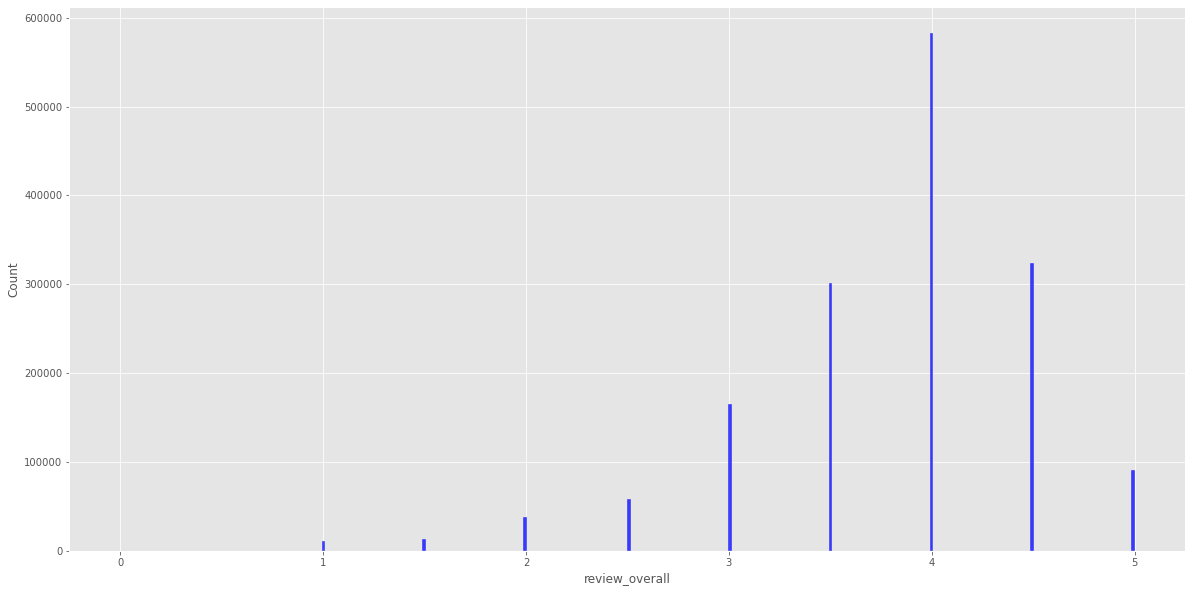

In [115]:
sb.histplot(beer_df["review_overall"], color="blue") # Rating distribution
# Interesting - beers mostly get a 4.0 rating.

<AxesSubplot:xlabel='review_appearance', ylabel='Count'>

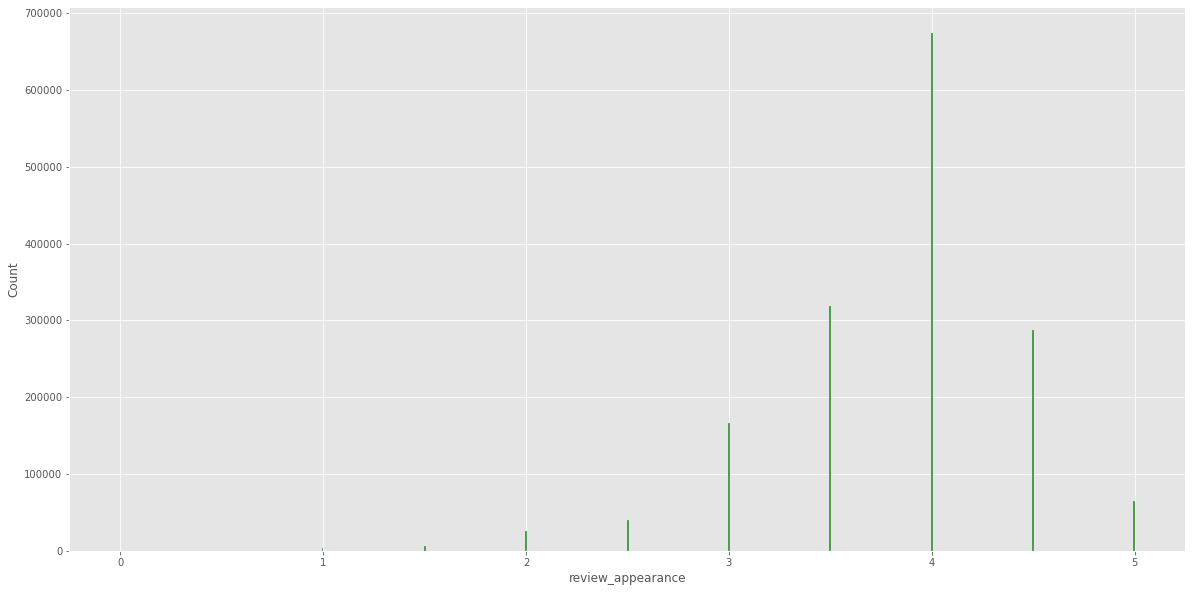

In [113]:
sb.histplot(beer_df["review_appearance"], color = "green")

<AxesSubplot:xlabel='review_palate', ylabel='Count'>

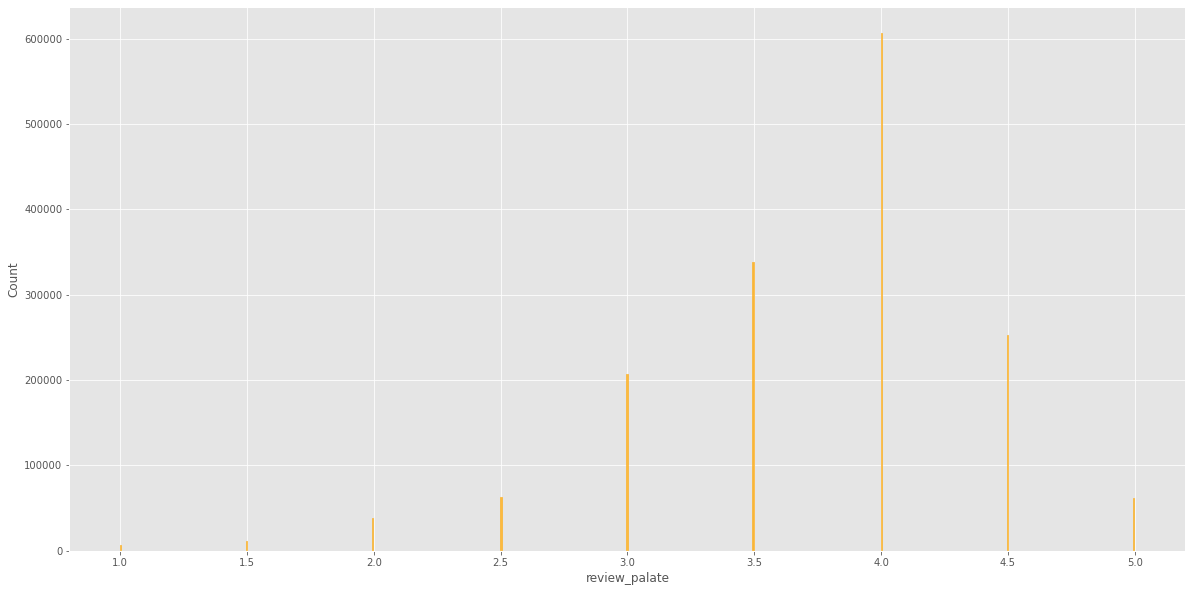

In [117]:
sb.histplot(beer_df["review_palate"], color = "orange")

<AxesSubplot:xlabel='review_aroma', ylabel='Count'>

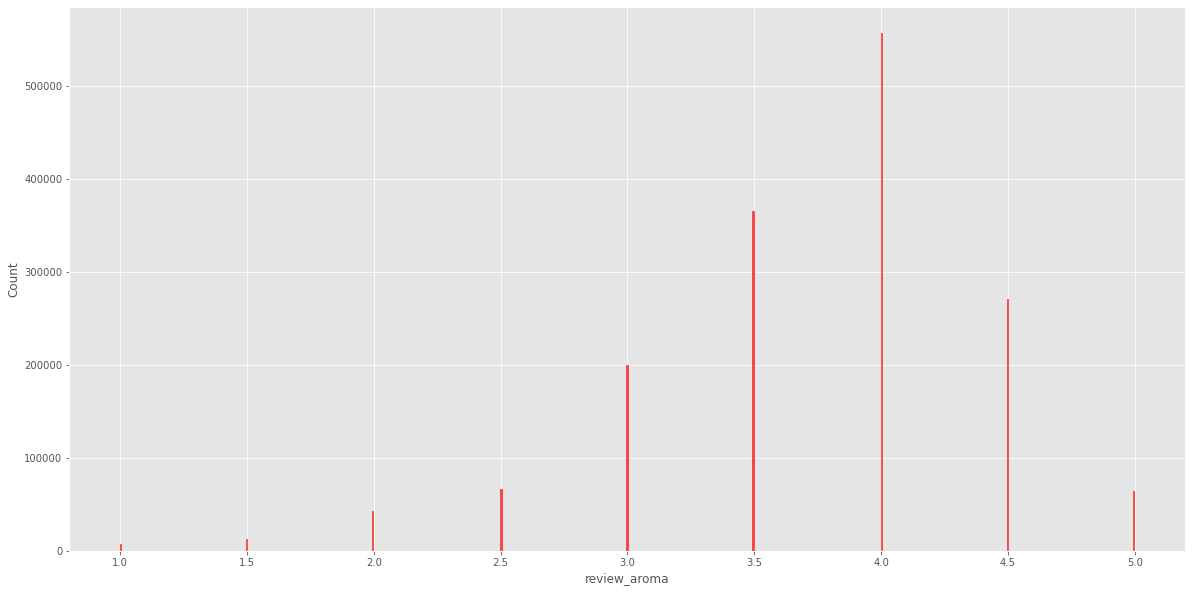

In [114]:
sb.histplot(beer_df["review_aroma"], color = "red") #Aroma, palate, and appearance are distributed similarly
# to overall rating - appearance has fewer very low ratings, likely because it is not something people
# feel as strongly about as smell or taste!

<AxesSubplot:ylabel='beer_style'>

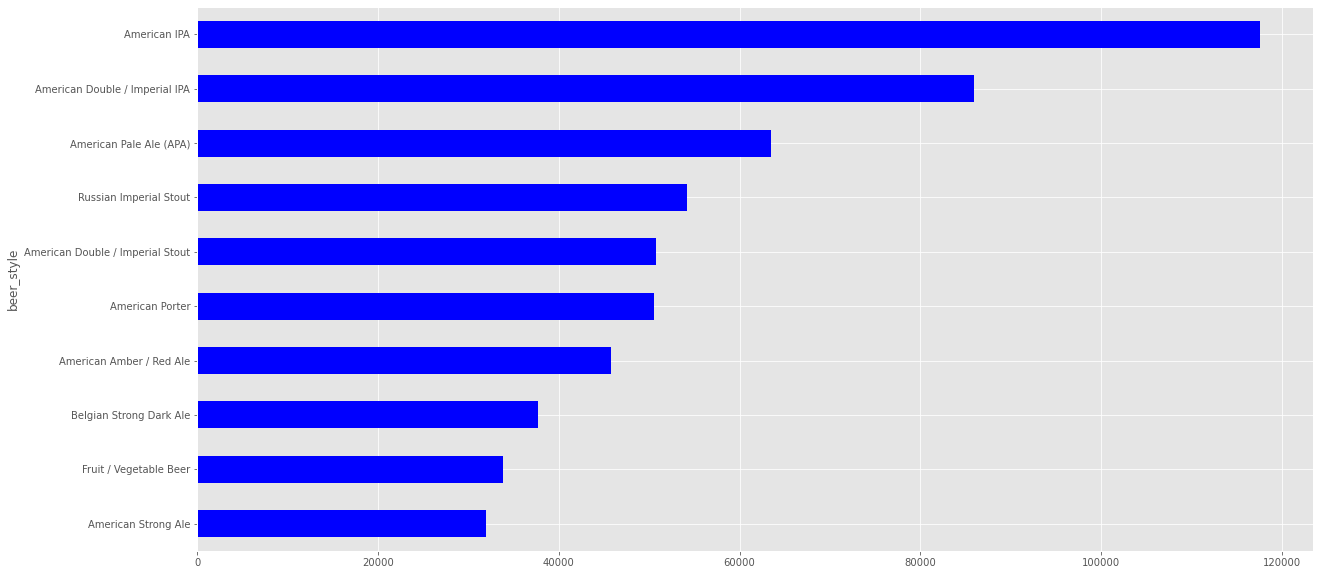

In [76]:
# number of ratings - top 10 most popular beers
df_top10_style = pd.DataFrame(beer_df.groupby(["beer_style"])["review_overall"].count().nlargest(10).sort_values(ascending = True))

df_top10_style.plot.barh(legend = False, color = 'blue')

<AxesSubplot:ylabel='brewery_name'>

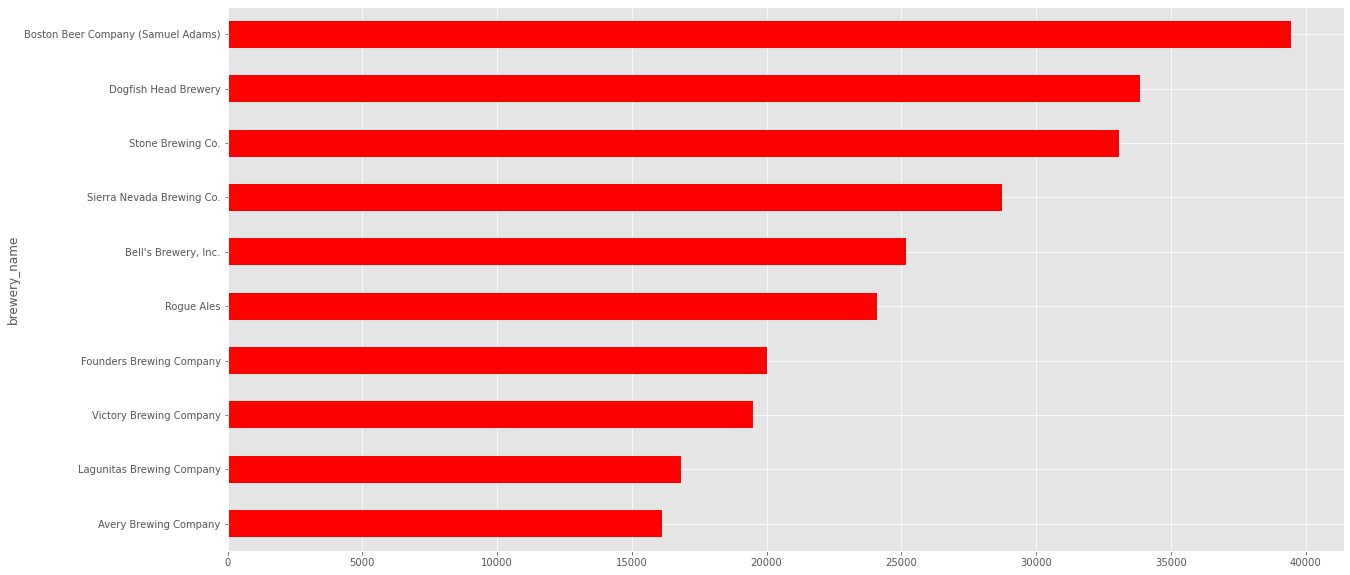

In [78]:
# number of ratings - top 10 most popular breweries
df_top10_brew = pd.DataFrame(beer_df.groupby(["brewery_name"])["review_overall"].count().nlargest(10).sort_values(ascending = True))

df_top10_brew.plot.barh(legend = False, color = 'red')

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?

I was surpised that some of the ratings categories start at 0 and some at 1 - it might make it tricky to compare ratings between the categories! My biggest concerns are about the missing ABV values, this is a large set of missing data and I will have to figure out how to deal with that. Besides that, the set seems pretty complete and I look forward to dealing with it further.